In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        plt.plot(r[0], label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
%load_ext autoreload
%autoreload 2

# Chapter 6 Time Difference Learning

### 6.1 Use TD0 to evaluate V

code see [TD0](./c06_td0.py#L11)

<img src="./avatar/c06_1.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 355 ms, sys: 30.8 ms, total: 385 ms
Wall time: 403 ms
CPU times: user 11.9 s, sys: 90.2 ms, total: 12 s
Wall time: 12.6 s
CPU times: user 3.68 s, sys: 31.2 ms, total: 3.71 s
Wall time: 4.02 s


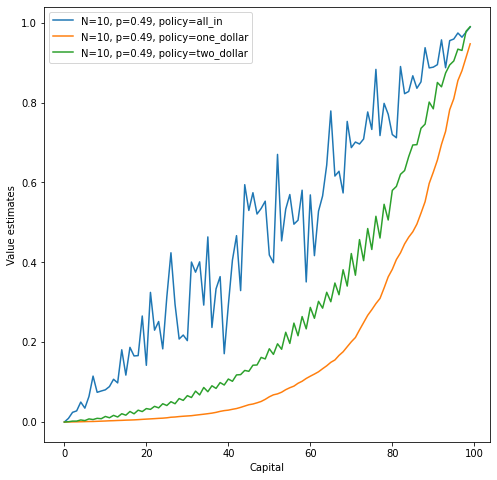

In [3]:
from c00_env import GamblerEnv, GamblerPolicy
from c06_td0 import TD0

env = GamblerEnv(N=100, p=0.49, include_terminate_state=False, seed=11)
td0 = TD0(env)
%time v_1 = td0.fit_v(policy=GamblerPolicy['all_in'], epochs=10000)
%time v_2 = td0.fit_v(policy=GamblerPolicy['one_dollar'], epochs=2000)
%time v_3 = td0.fit_v(policy=GamblerPolicy['two_dollar'], epochs=2000)

draw_gambler([
    (v_1, 'N={}, p={}, policy={}'.format(10, 0.49, 'all_in')),
    (v_2, 'N={}, p={}, policy={}'.format(10, 0.49, 'one_dollar')),
    (v_3, 'N={}, p={}, policy={}'.format(10, 0.49, 'two_dollar')),
])

In [5]:
from c00_env import HermanEnv, HermanPolicy
from c06_td0 import TD0

env = HermanEnv(N=11, M=3, p=0.5, seed=11)
td0 = TD0(env)
%time v_1 = td0.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))

CPU times: user 776 ms, sys: 30.9 ms, total: 807 ms
Wall time: 828 ms
[ 2.9247  4.8903  6.5676  5.961   6.0787 11.3013 12.5722 14.0105 16.5772
 17.4377] 17.4377 (0, 3, 7)


In [7]:
from c00_env import HermanEnv
from c06_td0 import TD0

env = HermanEnv(N=11, M=7, p=0.5, seed=11)
td0 = TD0(env)
%time v_2 = td0.fit_v(policy=HermanPolicy['random'], epochs=20000)

print(np.max(v_2), env.get_state_name(np.argmax(v_2)))

CPU times: user 1.85 s, sys: 20.5 ms, total: 1.87 s
Wall time: 1.97 s
16.1595 (0, 3, 7)


### 6.2 Use Sarsa to evaluate Q*

code see [Sarsa](./c06_td0.py#L40)

<img src="./avatar/c06_2.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 1.99 s, sys: 45 ms, total: 2.03 s
Wall time: 2.18 s
1 [0.0181]
2 [0.0312 0.0811]
3 [0.0524 0.1871 0.0357]
4 [0.2243 0.0786 0.0741 0.0713]
5 [0.1353 0.152  0.1155 0.2964 0.1087]
6 [0.3252 0.1871 0.189  0.16  ]
7 [0.4533 0.3139 0.3313]
8 [0.4099 0.644 ]
9 [0.732]


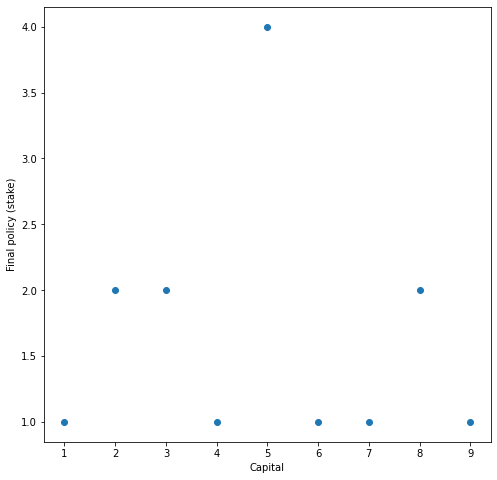

In [50]:
from c00_env import GamblerEnv
from c06_td0 import Sarsa

env = GamblerEnv(N=10, p=0.4, include_terminate_state=False, seed=11)
sarsa = Sarsa(env, decay=100)
%time q_1 = sarsa.fit_q(epochs=10000)

for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())

### 6.3 Use Q Learning to evaluate Q*

code see [QLearning](./c06_td0.py#L40)

<img src="./avatar/c06_3.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 12 s, sys: 238 ms, total: 12.2 s
Wall time: 13.5 s
1 [0.0381]
2 [0.032  0.1072]
3 [0.1421 0.0433 0.0397]
4 [0.0949 0.1163 0.2243 0.1075]
5 [0.2599 0.1325 0.124  0.0993 0.1232]
6 [0.2077 0.2093 0.2323 0.4146]
7 [0.4917 0.3417 0.3209]
8 [0.5722 0.5955]
9 [0.7957]


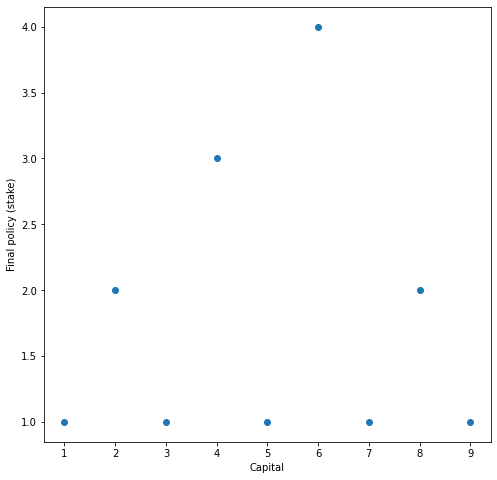

In [49]:
from c00_env import GamblerEnv
from c06_td0 import QLearning

env = GamblerEnv(N=10, p=0.4, include_terminate_state=False, seed=11)
ql = QLearning(env)
%time q_1 = ql.fit_q(epochs=50000)

for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())

### 6.4 Use Expection Sarsa to evaluate Q*

code see [QLearning](./c06_td0.py#L40)

<img src="./avatar/c06_4.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 18.5 s, sys: 494 ms, total: 19 s
Wall time: 18.8 s
1 [0.0151]
2 [0.0369 0.0709]
3 [0.1003 0.0525 0.0384]
4 [0.1683 0.0825 0.0709 0.0987]
5 [0.1562 0.1543 0.1566 0.1544 0.3855]
6 [0.257  0.3566 0.2328 0.288 ]
7 [0.4276 0.3475 0.3308]
8 [0.4168 0.6966]
9 [0.7846]


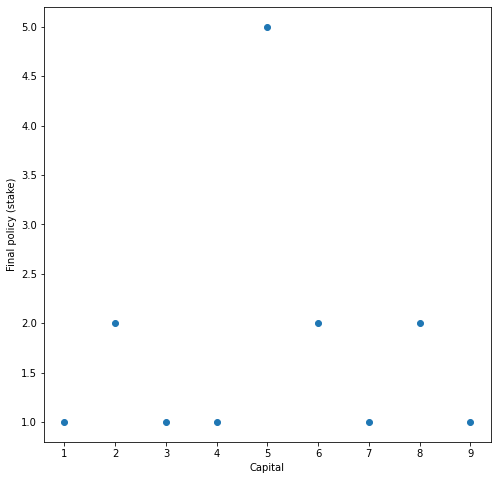

In [57]:
from c00_env import GamblerEnv
from c06_td0 import ExpectionSarsa

env = GamblerEnv(N=10, p=0.4, include_terminate_state=False, seed=11)
esarsa = ExpectionSarsa(env)
%time q_1 = esarsa.fit_q(epochs=50000)

for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())

### 6.5 Use double qlearning to evaluate Q*

code see [DoubleQLearning](./c06_td0.py#L40)

<img src="./avatar/c06_5.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 7.6 s, sys: 89.1 ms, total: 7.69 s
Wall time: 9.57 s
1 [0.0013]
2 [0.003  0.0116]
3 [0.012  0.0079 0.012 ]
4 [0.0464 0.0197 0.0186 0.0199]
5 [0.0563 0.0555 0.0539 0.0551 0.2008]
6 [0.1696 0.0913 0.1035 0.1034]
7 [0.1998 0.1426 0.1205]
8 [0.2409 0.3098]
9 [0.5142]


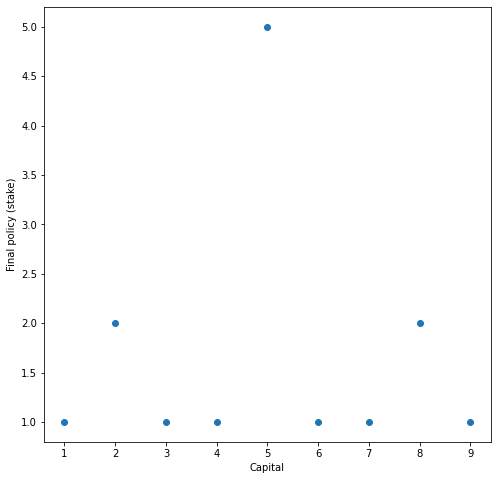

In [68]:
from c00_env import GamblerEnv
from c06_td0 import DoubleQLearning

env = GamblerEnv(N=10, p=0.2, include_terminate_state=False, seed=11)
dql = DoubleQLearning(env)
%time q_1 = dql.fit_q(epochs=50000)

for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())